<span style="color:#195879">

## The Minimum Viable Data Enthusiast
</span>

<span style="font-size:14.0pt">
<strong>Author:</strong></span> <span style="font-size:13.0pt">Manfredo E. Aceituno</span><br>
<span style="font-size:14.0pt"><strong>Date:</strong></span> <span style="font-size:13.0pt">June, 2024</span><br>
<span style="font-size:14.0pt"><strong>Programming language:</strong></span> <span style="font-size:13.0pt">Python</span>

<span style="font-size:13.0pt">
<span style="color:red">

## Netflix 
</span></span>

### Data analysis

## Table of Contents
<a id="table_content"></a>
1. [Introduction](#Introduction)
2. [Libraries](#Library)

## 1. Libraries
<a id="Library"></a>

In [152]:
import pandas as pd
import plotly.express as px
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='ggplot',offline=True)

## 2. Importing Datasets to DataFrames

In [102]:
df_netflix_movies = pd.read_csv('netflix_ready_file.csv', index_col=0)
df_netflix_genres = pd.read_csv('netflix_categories_matrix.csv')

## 3. Transforming data types

In [103]:
# Transforming integer values "df_netflix_movies" Dataframe
df_netflix_movies[['release_year','duration_value']] = (df_netflix_movies[['release_year','duration_value']]).apply(pd.to_numeric, 
                                                                     errors = 'coerce')

df_netflix_genres['duration_value'] = (df_netflix_genres['duration_value']).apply(pd.to_numeric,
                                                                                 errors = 'coerce')

In [104]:
# Transforming integer values "df_netflix_movies" Dataframe
df_netflix_movies['date_added'] = pd.to_datetime(df_netflix_movies['date_added'], format='%Y-%m-%d',
                                                errors ='coerce')

# Transforming integer values "df_netflix_genres" Dataframe
df_netflix_genres['date_added'] = pd.to_datetime(df_netflix_genres['date_added'], format = '%Y-%m-%d',
                                                errors = 'coerce')

In [105]:
# Revisando que las transformaciones en tipo de datos se hayan hecho
print('Summary of the variables types for "df_netflix_movies" DataFrame') 
print(f'{df_netflix_movies.dtypes.head(7)}\n')

print('Summary of the variables types for "df_netflix_genres" DataFrame')
print(f'{df_netflix_genres.dtypes.head(7)}')

Summary of the variables types for "df_netflix_movies" DataFrame
type                    object
title                   object
director                object
cast                    object
country                 object
release_year             int64
date_added      datetime64[ns]
dtype: object

Summary of the variables types for "df_netflix_genres" DataFrame
title                         object
type                          object
date_added            datetime64[ns]
country                       object
release_year                   int64
rating                        object
rating_description            object
dtype: object


## 4. Insights and visualizations

In [106]:
df_netflix_movies.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'date_added', 'rating', 'rating_description', 'duration',
       'duration_value', 'duration_time_unit', 'genre', 'description'],
      dtype='object')

In [296]:
df_netflix_movies.head(3)

,type,title,director,cast,country,release_year,date_added,rating,rating_description,duration,duration_value,duration_time_unit,genre,description
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2020,2021-09-25,PG-13,Teens,90 min,90.0,min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021-09-24,TV-MA,Mature audiences,2 Seasons,2.0,Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,2021,2021-09-24,TV-MA,Mature audiences,1 Season,1.0,Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [298]:
# Filtering Movies y TV Show
netflix_movies_filtered = df_netflix_movies.loc[
(df_netflix_movies["cast"] != "no_cast") & (df_netflix_movies["date_added"] != "no_date") & (df_netflix_movies["director"] != "no_director") &
(df_netflix_movies["country"] != "no_country") & ((df_netflix_movies["type"] == "Movie") | (df_netflix_movies["type"] == "TV Show")) &
(netflix_movies_filtered["rating_description"] != "no_rating")] 
[["type", "country","director", "cast","rating", "rating_description", "date_added"]]

netflix_movies_filtered[:3]

,type,title,director,cast,country,release_year,date_added,rating,rating_description,duration,duration_value,duration_time_unit,genre,description
show_id,,,,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,2021-09-24,TV-MA,Mature audiences,125 min,125.0,min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,2021-09-24,TV-14,Parents cautioned,9 Seasons,9.0,Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,2021-09-24,PG-13,Teens,104 min,104.0,min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [299]:
# Year to int and NaN to 0
netflix_movies_filtered["year_added"] = netflix_movies_filtered["date_added"].dt.year.fillna(0).astype("int64")

In [300]:
netflix_movies_filtered[:3]

,type,title,director,cast,country,release_year,date_added,rating,rating_description,duration,duration_value,duration_time_unit,genre,description,year_added
show_id,,,,,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,2021-09-24,TV-MA,Mature audiences,125 min,125.0,min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,2021-09-24,TV-14,Parents cautioned,9 Seasons,9.0,Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,2021-09-24,PG-13,Teens,104 min,104.0,min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021


### 4.1 

In [301]:
grouped_type_movies = netflix_movies_filtered.groupby(["year_added","type"]).size().reset_index(name="count")

In [302]:
grouped_type_movies = grouped_type_movies.sort_values(by=["year_added","count"], ascending=[False, False])[["year_added", "type", 
                                                                           "count"]]

In [303]:
grouped_type_movies[:8]

,year_added,type,count
20,2021,Movie,729
21,2021,TV Show,26
18,2020,Movie,1151
19,2020,TV Show,43
16,2019,Movie,1236
17,2019,TV Show,29
14,2018,Movie,1085
15,2018,TV Show,16


In [304]:
# Parameters for the first insight visualization bar graph
fig1 = px.bar(grouped_type_movies, x = "year_added", y="count", color="type",
              barmode="group", height=500,
              title = "Netflix released films",
              labels={"year_added":"Film available on Netflix (by Year)", "count":"No. of films", "type":"Films' type"}
             )

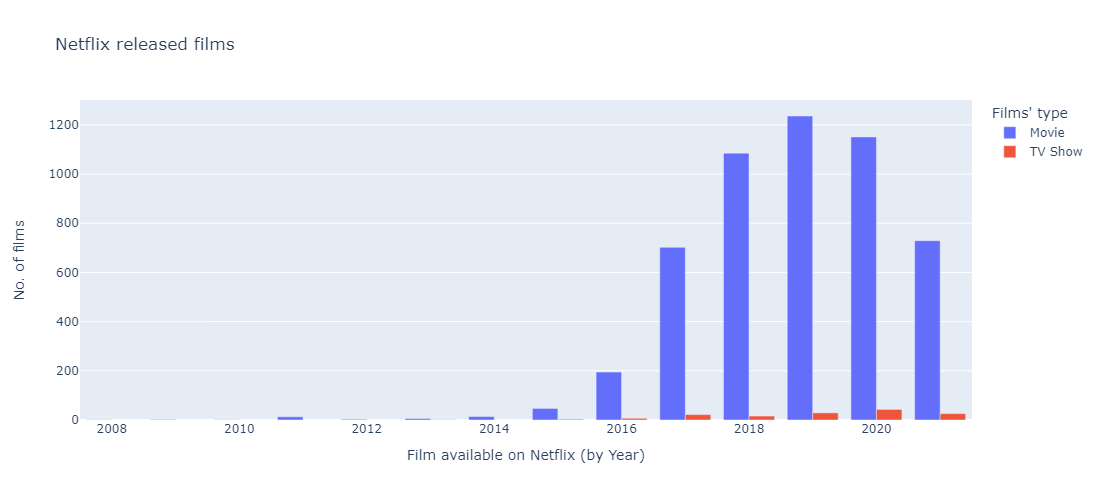

In [305]:
fig1

### 4.2 

In [306]:
# Filter for second insight visualization Ratings by country in a treemap
grouped_netflix_rating = netflix_movies_filtered.groupby(['country','rating_description']).size().reset_index(name='count')

In [307]:
# Dropping "country" rows that contain more than one country in the same row.
grouped_netflix_rating = grouped_netflix_rating[~grouped_netflix_rating['country'].str.contains(',')]

grouped_netflix_rating[:5]

,country,rating_description,count
1,Argentina,Mature audiences,27
2,Argentina,Not Rated,2
3,Argentina,Parental guidance,2
4,Argentina,Parents cautioned,3
5,Argentina,Restricted (17+),1


In [308]:
# Parameters for the second insight visualization Treemap graph
fig2 = px.treemap(grouped_netflix_rating, path=["rating_description", "country"], values = "count",
                  color="count",
                 title = "Film ratings' distribution released by Country",
                  labels={"parent":"Rating", "labels":"Label", "count":"No. of films"}) 

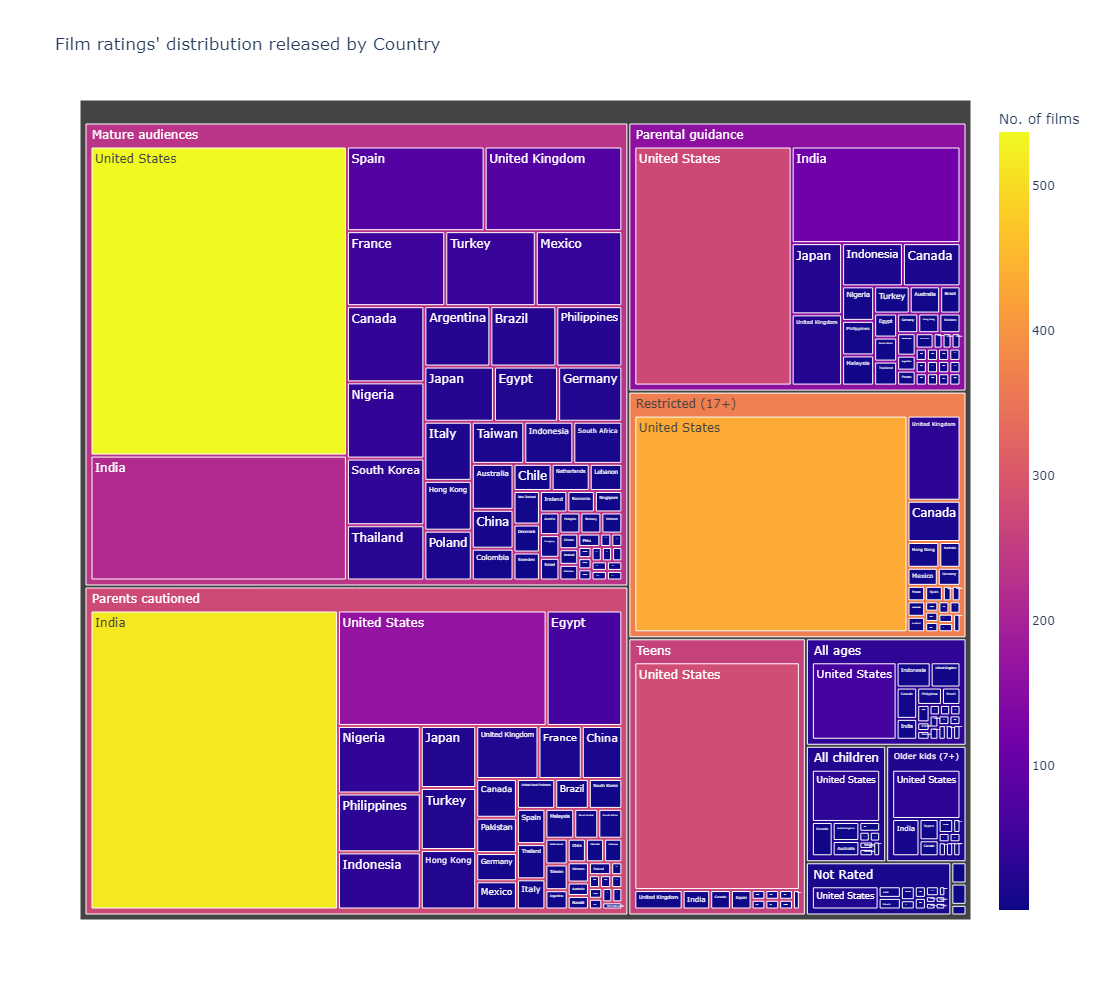

In [309]:
fig2.update_layout(height=1000)

### 4.3

In [311]:
# Filtering films with duration in "min"
netflix_movies_filtered_min = netflix_movies_filtered.loc[(netflix_movies_filtered["duration_time_unit"] == "min")]

In [312]:
# Average duration_value by film's rating
netflix_av_duration = netflix_movies_filtered_min.groupby("rating_description") ["duration_value"].mean().round(0).reset_index()

In [313]:
netflix_av_duration = netflix_av_duration.sort_values(by=["duration_value"],ascending=False)
netflix_av_duration

,rating_description,duration_value
0,Adults Only,146.0
8,Parents cautioned,114.0
10,Teens,109.0
9,Restricted (17+),107.0
11,Unrated,106.0
7,Parental guidance,100.0
4,Mature audiences,97.0
5,Not Rated,96.0
1,All ages,87.0
3,Fantasy Violence,77.0


In [316]:
fig3 = px.bar(netflix_av_duration, x = "rating_description", y = "duration_value",
             color = "duration_value",
             title = "Avg. films' duration by ratings",
             labels={"rating_description":"Rating description", "duration_value":"Avg duration (min)"}
             )

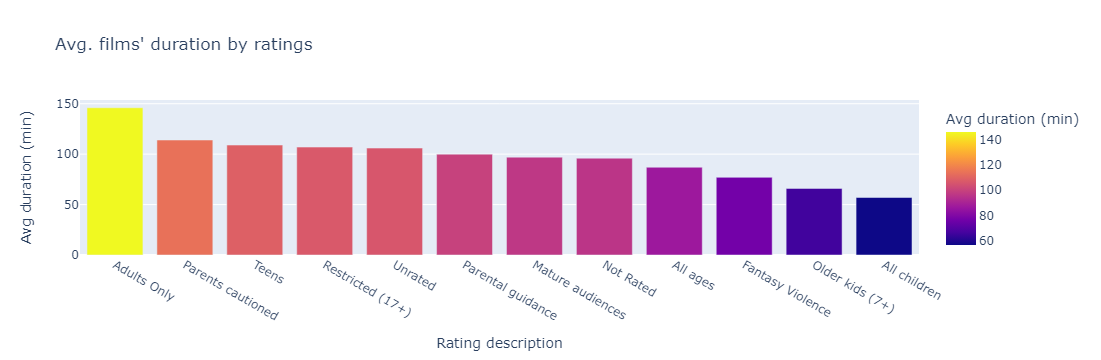

In [317]:
fig3

### 4.4

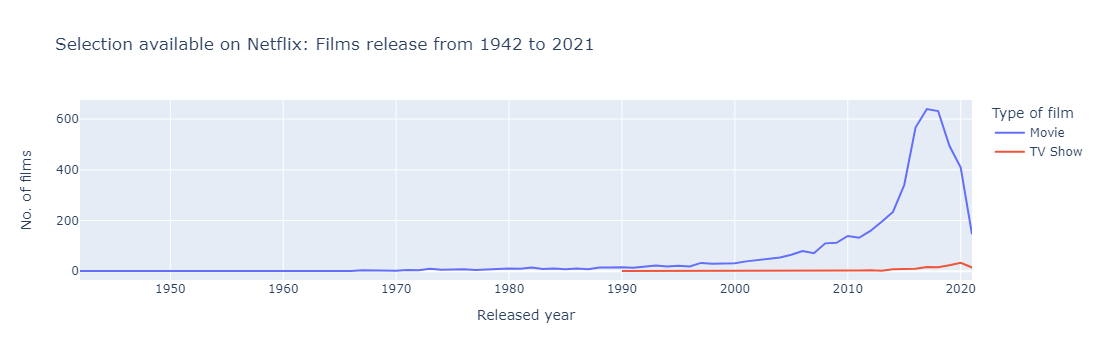

In [427]:
 netflix_by_year_type = netflix_movies_filtered.groupby(['release_year', 'type']).size().reset_index(name='count')

# Graph
fig4 = px.line(netflix_by_year_type, x='release_year', y='count', color='type',
               title='Selection available on Netflix: Films release from 1942 to 2021',
               labels={'release_year': 'Released year', 'count': 'No. of films', 'type': 'Type of film'})
fig4.show()

### 4.5

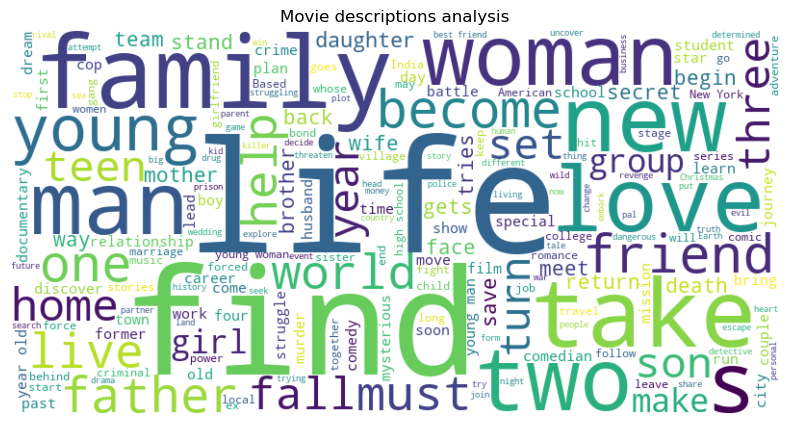

In [328]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(description for description in netflix_movies_filtered.description.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Movie descriptions analysis')
plt.show()

## 5. Insighst del segundo DataFrame

In [403]:
# Standardizing "duration_time_unit" for "Seasons" to "Season"
df_netflix_genres['duration_time_unit'] = df_netflix_genres['duration_time_unit'].str.replace('Seasons', 'Season')

In [424]:
# Crear un subconjunto del dataframe con sólo las columnas de géneros y 'duration_value'
genres_columns = df_netflix_genres.columns[10:]

# Filter to eliminate the string "Seasons" from "duration_time_unit"
df_netflix_genres_no_unit = df_netflix_genres["duration_time_unit"] != "no_unit"

df_genres_duration = df_netflix_genres.loc[(df_netflix_genres["duration_time_unit"] != "Season") & (df_netflix_genres_no_unit)]

In [437]:
df_genres_duration = df_genres_duration[['duration_value'] + list(genres_columns)]

# Convertir a formato largo
df_genres_duration_long = df_genres_duration.melt(id_vars=['duration_value'], 
                                                  var_name='genre', 
                                                  value_name='count')

# Filtrar sólo los géneros que están presentes
df_genres_duration_long = df_genres_duration_long[df_genres_duration_long['count'] == 1]

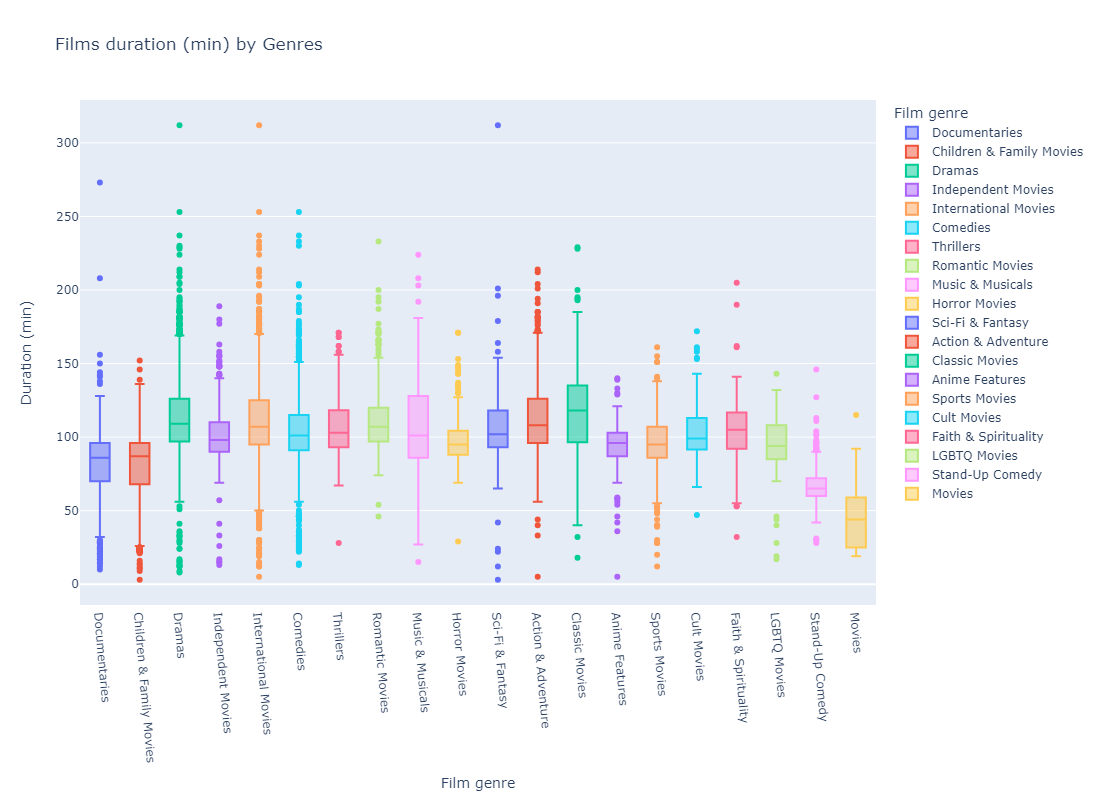

In [446]:
# Crear el box plot
fig5 = px.box(df_genres_duration_long, x='genre', y='duration_value', height=800, color="genre",
             title='Films duration (min) by Genres',
             labels={'duration_value': 'Duration (min)', 'genre': 'Film genre'})

fig5.update_layout(xaxis=dict(tickangle=85))
fig5.show()